In [ ]:
import pandas as pd
import numpy as np
import math
import statistics as stat
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv')
#us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-06-2020.csv')

In [ ]:
df_bd_con =df_confirmed[df_confirmed['Country/Region']=='Bangladesh']
df_bd_deaths=df_deaths[df_deaths['Country/Region']=='Bangladesh']
df_bd_recovered=df_recovered[df_recovered['Country/Region']=='Bangladesh']

In [ ]:
col_names=df_bd_con.keys()
bd_confirmed=df_bd_con.loc[:, col_names[50]:col_names[-1]]
bd_deaths=df_bd_deaths.loc[:, col_names[50]:col_names[-1]]
bd_recovered=df_bd_recovered.loc[:, col_names[50]:col_names[-1]]

In [ ]:
dates=bd_confirmed.keys()

In [ ]:
new_df=bd_confirmed.melt(var_name="Date",value_name="Cumulative Count")
daily_count=new_df.set_index('Date').diff()
new_df['Count']=daily_count['Cumulative Count'].values
new_df.fillna(0,inplace=True)
new_df['Count']=new_df['Count'].astype(np.int64)

In [ ]:
new_df.dtypes

Date                object
Cumulative Count     int64
Count                int64
dtype: object

In [ ]:
new_df.shape[0]

143

In [ ]:
new_df['Count'].describe()

count     143.000000
mean     1602.671329
std      1401.532505
min         0.000000
25%       160.500000
50%      1251.000000
75%      2938.500000
max      4019.000000
Name: Count, dtype: float64

In [ ]:
!pip install pystan

In [ ]:
!pip install fbprophet

In [ ]:
new_df.drop('Count', axis=1, inplace=True)

In [ ]:
new_df.columns = ['ds', 'y']

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
test=new_df.y.iloc[:135].to_list()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


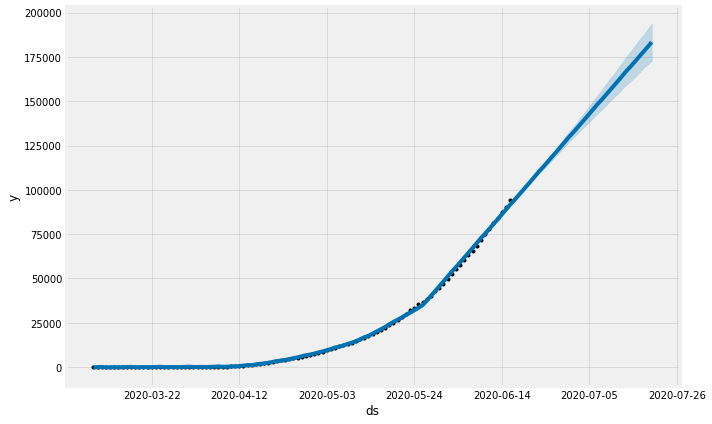

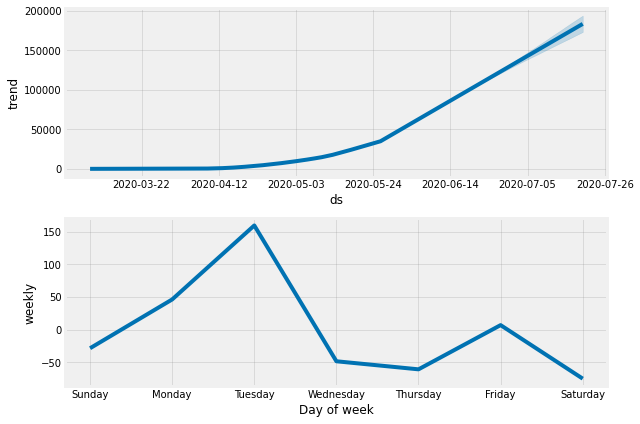

In [ ]:
model = Prophet()
model.fit(new_df.iloc[:101])
future = model.make_future_dataframe(periods=34)
forecast = model.predict(future)

plot1 = model.plot(forecast).savefig('con_pr_prophet')
fig=model.plot_components(forecast).savefig('con_prophet.png')


In [ ]:
predictions=forecast.yhat.iloc[:135].to_list()

In [ ]:
predictions[0]

-121.70118631134643

In [ ]:
squared_error=[]
for j in range(0,len(test)):
  squared_error.append((test[j]-predictions[j])**2)
sd=stat.stdev(squared_error)
weight=mean_squared_error(predictions,test)/sd
print("Confirm Case Weight: ",weight)

Confirm Case Weight:  0.4742798897182157


MSE: 81560022.4775685
RMAE: 67.10630274628772
MAE: 4503.255868276424
RMSE: 9031.058768359804


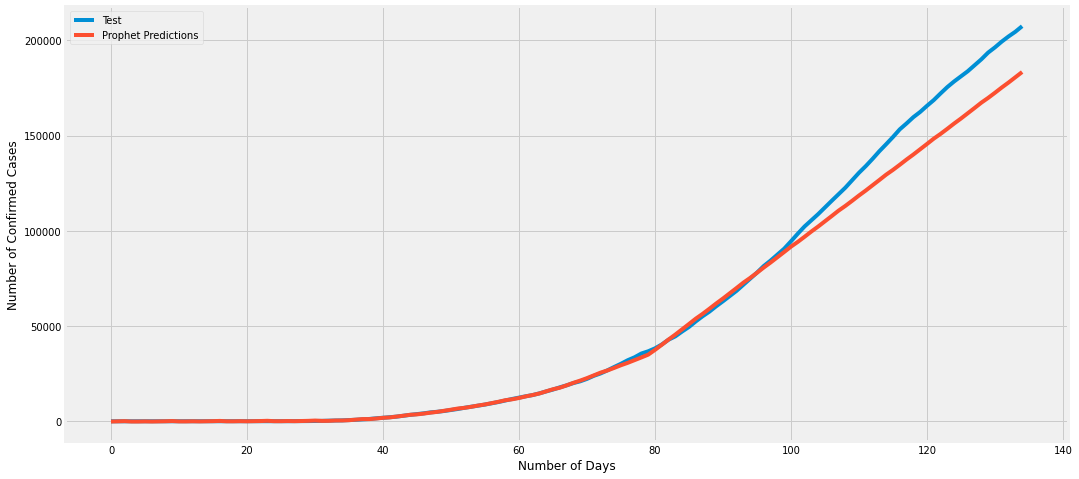

In [ ]:
fig=plt.figure(figsize=(16,8))
print('MSE: '+str(mean_squared_error(predictions,test)))
print('RMAE: '+str(math.sqrt(mean_absolute_error(predictions,test))))
print('MAE: '+str(mean_absolute_error(predictions,test)))
print('RMSE: '+str(math.sqrt(mean_squared_error(predictions,test))))
plt.plot(test)
plt.plot(predictions)
plt.xlabel("Number of Days")
plt.ylabel("Number of Confirmed Cases")
plt.legend(['Test','Prophet Predictions'])
fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'ProphetTest_con.png')

#Death Cases

In [ ]:
new_df=bd_deaths.melt(var_name="Date",value_name="Cumulative Count")
daily_count=new_df.set_index('Date').diff()
new_df['Count']=daily_count['Cumulative Count'].values
new_df.fillna(0,inplace=True)
new_df['Count']=new_df['Count'].astype(np.int64)

In [ ]:
new_df['Count'].describe()

count    143.000000
mean      20.979021
std       18.096171
min        0.000000
25%        3.000000
50%       16.000000
75%       38.000000
max       64.000000
Name: Count, dtype: float64

In [ ]:
num_of_days = 60

count_sim_df = []
cuml_count_df = []
date_list = []


# generate count for next num_days
# count_sim=np.random.choice(8, 30, p=[1/69, 9/69, 22/69, 16/69, 3/69, 4/69, 3/69, 11/69]).round()
count_sim = np.random.normal(9.2967,10.4748 ,60).round()
cuml_count_df = []
count_sim_df = pd.DataFrame({'Count' : count_sim})
cuml_count=new_df['Cumulative Count'].max()
for j in range(0,num_of_days):
  cuml_count = cuml_count + count_sim[j]
  cuml_count_df.append((cuml_count))
  cuml_sim_df = pd.DataFrame({'Cumulative Count' : cuml_count_df})

# create running dates
days_in_future = 60 # only 10 days forcasting
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-60]    
start = '3/08/2020'
start_date = dt.datetime.strptime(start, '%m/%d/%Y')
f_forcast_dates = []
for i in range(len(future_forcast)):
    f_forcast_dates.append((start_date + dt.timedelta(days=i)).strftime('%m/%d/%Y'))
# combine all dataframes
date_list=pd.DataFrame({'Date': f_forcast_dates[-60:]})
df_sim = pd.concat([date_list, cuml_sim_df,count_sim_df], axis=1)

In [ ]:
df_sim_final = pd.DataFrame(columns=['Date', 'Cumulative Count','Count'])

In [ ]:
df_sim_final = df_sim_final.append((df_sim))

In [ ]:
df = new_df.copy()
df = df.append(df_sim_final)

In [ ]:
list1=new_df['Cumulative Count'].to_list()
list2=df['Cumulative Count'].to_list()

In [ ]:
list3=df_sim_final['Cumulative Count'].to_list()

In [ ]:
len(list3)

60

In [ ]:
list3[-1]

3578.0

In [ ]:
# fig=plt.figure(figsize=(8,6))
# plt.plot(range(0,142),list1,color='darkblue',lw=4.5)
# plt.plot(range(142,142+60),list3,color='red',lw=4.5)
# plt.show()
# fig.savefig('death_monte.png')

In [ ]:
new_df.drop('Count', axis=1, inplace=True)

In [ ]:
new_df.columns = ['ds', 'y']

In [ ]:
test=new_df.y.iloc[101:135].to_list()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


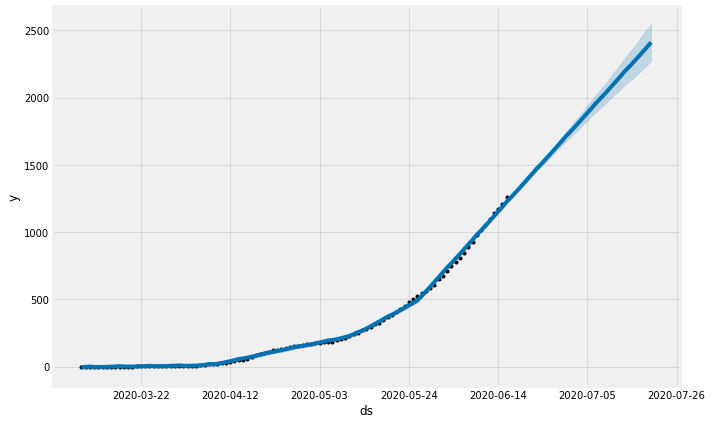

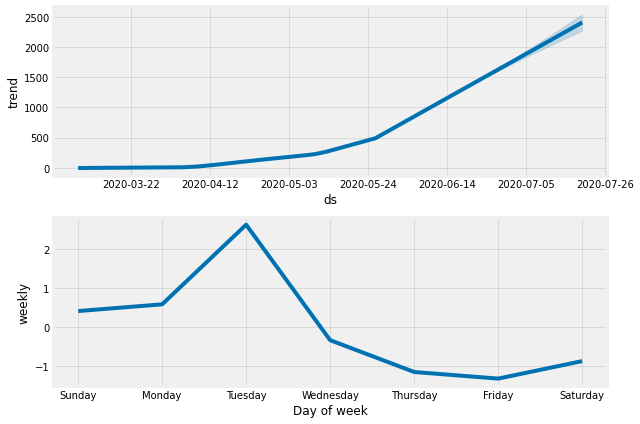

In [ ]:
model = Prophet()
model.fit(new_df.iloc[:101])
future = model.make_future_dataframe(periods=34)
forecast = model.predict(future)

plot1 = model.plot(forecast).savefig('death_pr_prophet')
fig=model.plot_components(forecast).savefig('death_prophet.png')

In [ ]:
predictions=forecast.yhat.iloc[101:135].to_list()


In [ ]:
squared_error=[]
for j in range(0,len(test)):
  squared_error.append((test[j]-predictions[j])**2)
sd=stat.stdev(squared_error)
weight=mean_squared_error(predictions,test)/sd
print("Death Case Weight: ",weight)

Death Case Weight:  1.3273232196616327


MSE: 28074.27494828866
RMSE: 167.55379717657448
RMAE: 12.370052136594985
MAE: 153.01818986207817


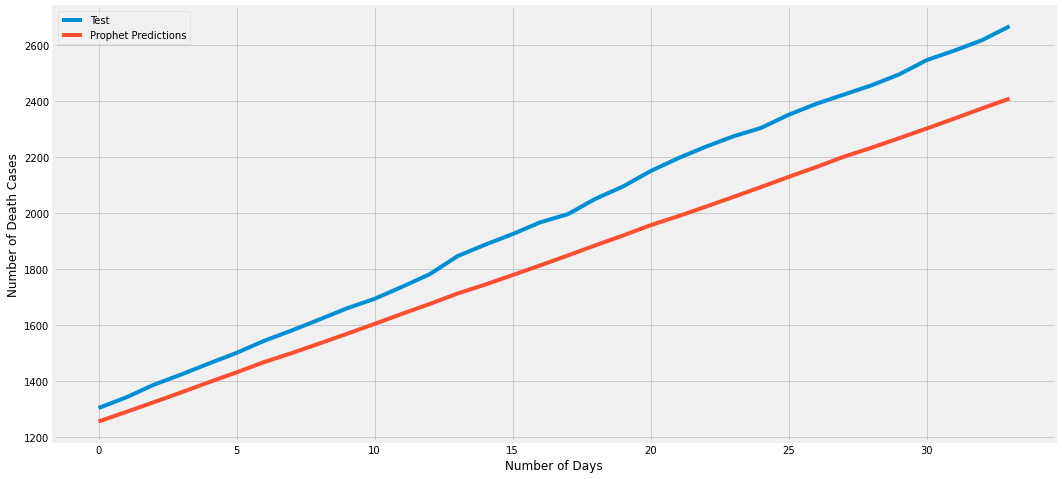

In [ ]:
fig=plt.figure(figsize=(16,8))
print('MSE: '+str(mean_squared_error(predictions,test)))
print('RMSE: '+str(math.sqrt(mean_squared_error(predictions,test))))
print('RMAE: '+str(math.sqrt(mean_absolute_error(predictions,test))))
print('MAE: '+str(mean_absolute_error(predictions,test)))
plt.plot(test)
plt.plot(predictions)
plt.xlabel("Number of Days")
plt.ylabel("Number of Death Cases")
plt.legend(['Test','Prophet Predictions'])
fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'ProphetTest_death.png')

#Recovered

In [ ]:
new_df=bd_recovered.melt(var_name="Date",value_name="Cumulative Count")
daily_count=new_df.set_index('Date').diff()
new_df['Count']=daily_count['Cumulative Count'].values
new_df.fillna(0,inplace=True)
new_df['Count']=new_df['Count'].astype(np.int64)

In [ ]:
new_df['Count'].describe()

count      143.000000
mean       891.006993
std       1777.118785
min          0.000000
25%          3.000000
50%        296.000000
75%       1424.500000
max      17533.000000
Name: Count, dtype: float64

In [ ]:
num_of_days = 60

count_sim_df = []
cuml_count_df = []
date_list = []


# generate count for next num_days
# count_sim=np.random.choice(8, 30, p=[1/69, 9/69, 22/69, 16/69, 3/69, 4/69, 3/69, 11/69]).round()
count_sim = np.random.normal(9.2967,10.4748 ,60).round()
cuml_count_df = []
count_sim_df = pd.DataFrame({'Count' : count_sim})
cuml_count=new_df['Cumulative Count'].max()
for j in range(0,num_of_days):
  cuml_count = cuml_count + count_sim[j]
  cuml_count_df.append((cuml_count))
  cuml_sim_df = pd.DataFrame({'Cumulative Count' : cuml_count_df})

# create running dates
days_in_future = 60 # only 10 days forcasting
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-60]    
start = '3/08/2020'
start_date = dt.datetime.strptime(start, '%m/%d/%Y')
f_forcast_dates = []
for i in range(len(future_forcast)):
    f_forcast_dates.append((start_date + dt.timedelta(days=i)).strftime('%m/%d/%Y'))
# combine all dataframes
date_list=pd.DataFrame({'Date': f_forcast_dates[-60:]})
df_sim = pd.concat([date_list, cuml_sim_df,count_sim_df], axis=1)

In [ ]:
df_sim_final = pd.DataFrame(columns=['Date', 'Cumulative Count','Count'])

In [ ]:
df_sim_final = df_sim_final.append((df_sim))

In [ ]:
df = new_df.copy()
df = df.append(df_sim_final)

In [ ]:
list1=new_df['Cumulative Count'].to_list()
list2=df['Cumulative Count'].to_list()

In [ ]:
list3=df_sim_final['Cumulative Count'].to_list()

In [ ]:
list3[-1]

128085.0

In [ ]:
# fig=plt.figure(figsize=(8,6))
# plt.plot(range(0,91),list1,color='darkblue',lw=4.5)
# plt.plot(range(91,91+60),list3,color='red',lw=4.5)
# plt.show()
# fig.savefig('rec_monte.png')

In [ ]:
new_df.drop('Count', axis=1, inplace=True)

In [ ]:
new_df.columns = ['ds', 'y']

In [ ]:
test=new_df.y.iloc[101:135].to_list()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


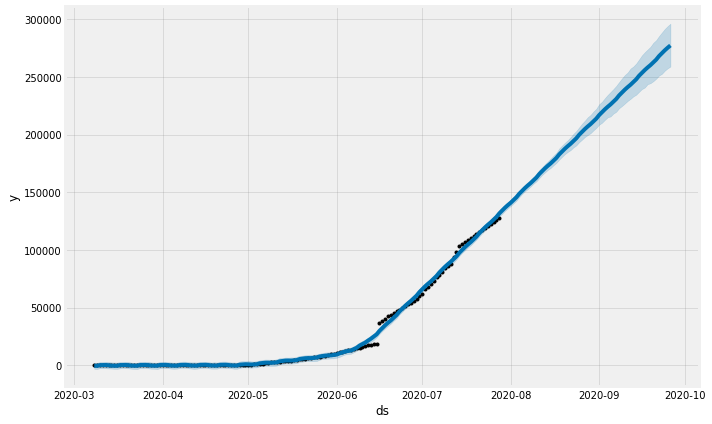

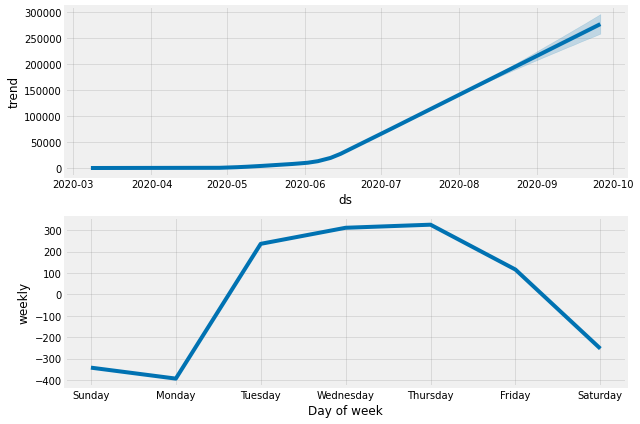

In [ ]:
model = Prophet()
model.fit(new_df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

plot1 = model.plot(forecast).savefig('rec_pr_prophet')
fig=model.plot_components(forecast).savefig('rec_prophet.png')

In [ ]:
predictions=forecast.yhat.iloc[101:135].to_list()

In [ ]:
squared_error=[]
for j in range(0,len(test)):
  squared_error.append((test[j]-predictions[j])**2)
sd=stat.stdev(squared_error)
weight=mean_squared_error(predictions,test)/sd
print("Recover Case Weight: ",weight)

Recover Case Weight:  0.9825164732884778


MSE: 10898908.415525718
RMSE: 3301.3494840028247
RMAE: 53.39968839826396
MAE: 2851.526721031687


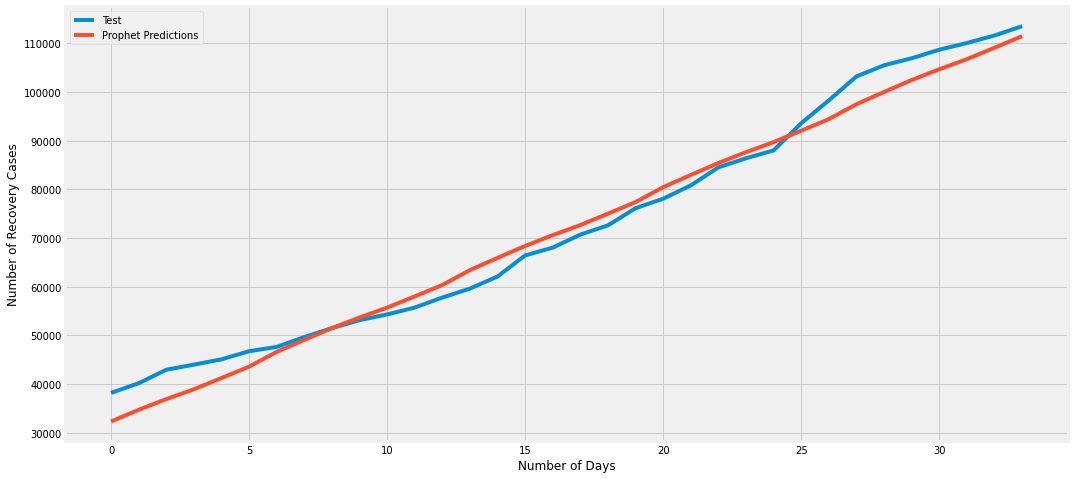

In [ ]:
fig=plt.figure(figsize=(16,8))
print('MSE: '+str(mean_squared_error(predictions,test)))
print('RMSE: '+str(math.sqrt(mean_squared_error(predictions,test))))
print('RMAE: '+str(math.sqrt(mean_absolute_error(predictions,test))))
print('MAE: '+str(mean_absolute_error(predictions,test)))
plt.plot(test)
plt.plot(predictions)
plt.xlabel("Number of Days")
plt.ylabel("Number of Recovery Cases")
plt.legend(['Test','Prophet Predictions'])
fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'ProphetTest_rec.png')